In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

#variable path to contain directory with Yelp data
path = '/home/dummy_user/badams_testing/'

In [30]:
shampoo = pd.read_csv(path + 'shampoo.csv')
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [23]:
#lets check for null values
shampoo.isnull().sum()

Month    0
Sales    0
dtype: int64

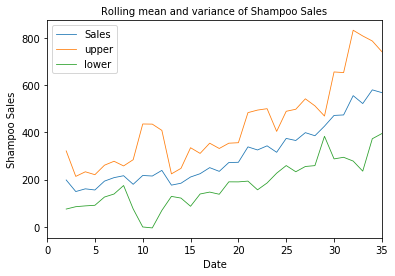

In [27]:
# Compute the 3 year rolling mean of the shampoo DataFrame
ma = shampoo.rolling(window=3).mean()

# Compute the 3 year rolling standard deviation of the shampoo DataFrame
mstd = shampoo.rolling(window=3).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['Sales'] + (2 * mstd['Sales'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['Sales'] - (2 * mstd['Sales'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=10)

# Specify labels, legend, and show the plot
ax.set_xlabel('Month (Number)', fontsize=10)
ax.set_ylabel('Shampoo Sales', fontsize=10)
ax.set_title('Rolling mean and variance of Shampoo Sales', fontsize=10)
plt.show()

Above we have a chart showing the rolling mean and variance for our shampoo sales data, which allows us to smooth out short term flucations, highlight long term trends/cycles, and remove outliers.  Below you can see the mean of our sunset data by year as well.

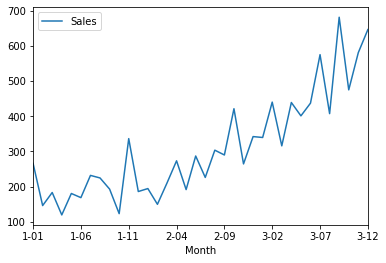

In [29]:
#lets check out mean sales by Month over this 3 year period
shampoo_by_year  =shampoo.groupby('Month').mean()
shampoo_by_year.plot()
plt.show()

In [31]:
shampoo.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


From the summary statistics of our Shampoo Sales data we can see we have a mean of 312.6, minimum of 119 and a Max of 682.  our standard Deviation for his dataset is 148.93.
Below we are displaying a histogram of the Shampoo Sales data.  This output shows our data doesnt have much frequency, one could interpret this as maybe bi-modal, meaning there could be two different frequency intervals, but there is no uniformity to it. 

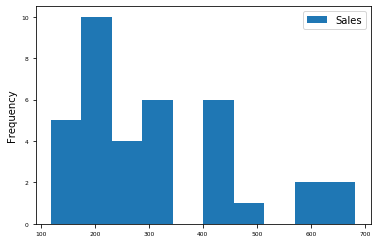

In [33]:
# Generate a histogram
shampoo_hist = shampoo.plot(kind='hist', bins=10, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('Sales', fontsize=10)
ax.set_ylabel('Histogram of Shampoo Sales', fontsize=10)
plt.legend(fontsize=10)
plt.show()

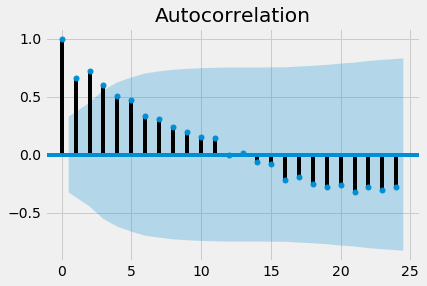

In [34]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(shampoo['Sales'], lags=24)

# Show plot
plt.show()

Above we have run an autocorrelation plot.  The biggest take away from this Autocorrelation shart is that we dont have much statistical significance with this data, as many of the data point fall within the confidence interval (shaded blue area).  There is some slight correlation between points 1, 2, and 3.  

/home/centos/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


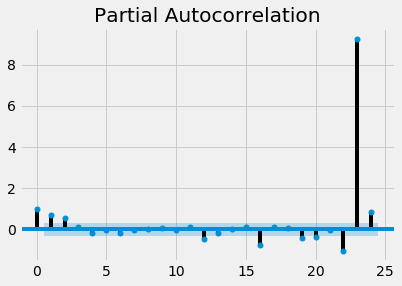

In [35]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(shampoo['Sales'], lags=24)

# Show plot
plt.show()

Above we have run a Partitial Autocorrelation plot.  In partial autocorrelation we want to see at which lag values do we have statistically significant partial autocorrelations.  Here we can see that at points 0 through 3, 12, 16, 19, 20, 22, 23, 24 are statistically significant autocorrelations.  

Now lets run the decomposition method for our time-series data.  This allows us to extract and quantify the structure of our time-series data.  

In [36]:
# Import statsmodels.api as sm
import statsmodels.api as sm

#code to index our dataset with the month column
#shampoo = shampoo.set_index('Month')

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(shampoo, freq=12)

# Print the seasonality component
print(decomposition.seasonal)

           Sales
Month           
1-01  -19.193924
1-02   -2.218924
1-03  -48.175174
1-04   27.591493
1-05  -44.800174
1-06    6.345660
1-07    2.951910
1-08   30.431076
1-09   -1.171007
1-10   20.295660
1-11   37.274826
1-12   -9.331424
2-01  -19.193924
2-02   -2.218924
2-03  -48.175174
2-04   27.591493
2-05  -44.800174
2-06    6.345660
2-07    2.951910
2-08   30.431076
2-09   -1.171007
2-10   20.295660
2-11   37.274826
2-12   -9.331424
3-01  -19.193924
3-02   -2.218924
3-03  -48.175174
3-04   27.591493
3-05  -44.800174
3-06    6.345660
3-07    2.951910
3-08   30.431076
3-09   -1.171007
3-10   20.295660
3-11   37.274826
3-12   -9.331424


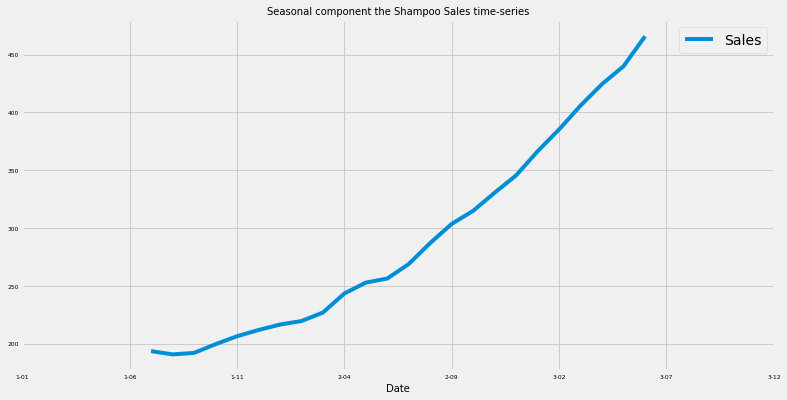

In [37]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the Shampoo Sales time-series', fontsize=10)
plt.show()

So we can see here the trend that Sales are increaing pretty drastically over the three year period of this dataset. 

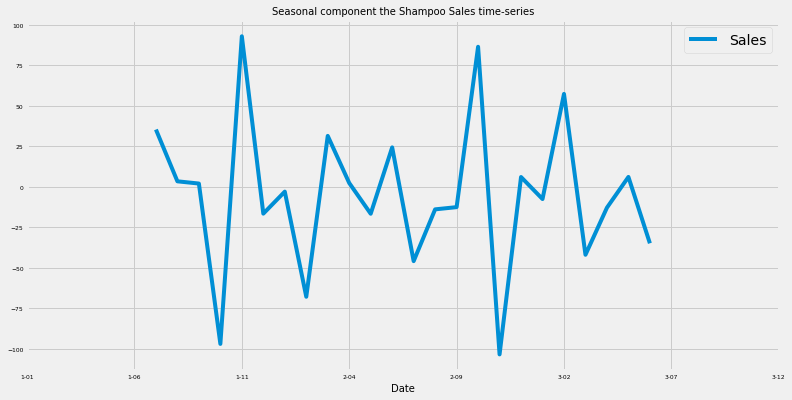

In [38]:
# Extract the noise component
noise = decomposition.resid

# Plot the values of the trend
ax = noise.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the Shampoo Sales time-series', fontsize=10)
plt.show()

WE can see massive spikes in our residuals here, both high and low.  So we had an unexpected dip in sales sometime around the end of Q3 the first year and also year 2.  The first dip was preceded by an unexpected jump in sales in Q4, where in year 2 the dip followed a big jump in sales. 